In [78]:
import pandas as pd


In [79]:
df=pd.read_csv('train.csv')

In [80]:
df.shape

(32561, 15)

# Data Understanding


In [81]:
print(df.head())

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  result  
0          2174             0              40   United-States   <=50

In [82]:

df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [83]:
df.info()
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  result          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
age                  0
workclass         1836
fnlwgt               0
education            0
e

# Data Cleaning

In [84]:
df.isna().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0


In [85]:
df=df.dropna()

In [86]:
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


# Data Visualizations

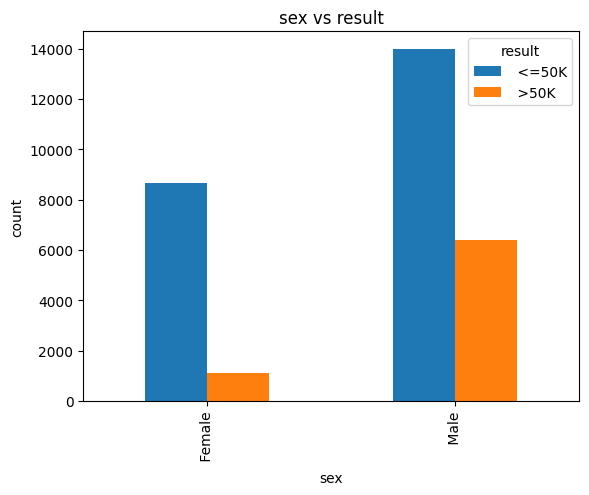

In [87]:
# prompt: create a grouped barchart for sex vs result

import matplotlib.pyplot as plt

df.groupby('sex')['result'].value_counts().unstack().plot(kind='bar')
plt.title('sex vs result')
plt.xlabel('sex')
plt.ylabel('count')
plt.show()


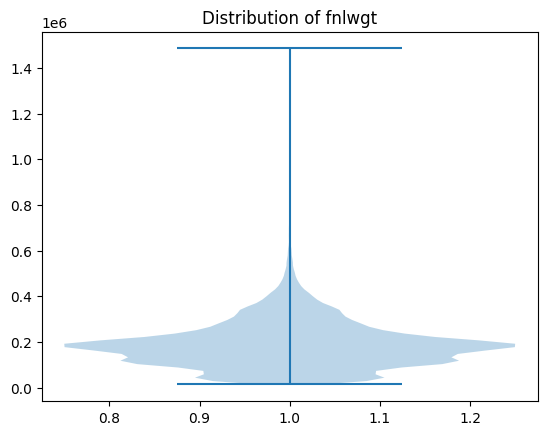

In [88]:
plt.violinplot(df['fnlwgt'])
plt.title('Distribution of fnlwgt')
plt.show()

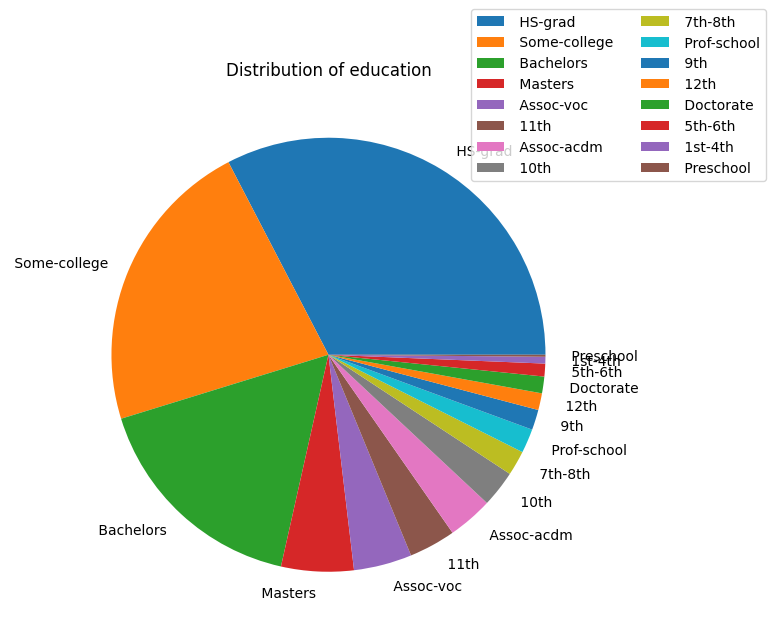

In [89]:
plt.figure(figsize=(7,10))
plt.pie(df['education'].value_counts(), labels=df['education'].value_counts().index)

plt.title('Distribution of education')
plt.legend( bbox_to_anchor=(0.75, 1.15), ncol=2)
plt.show()

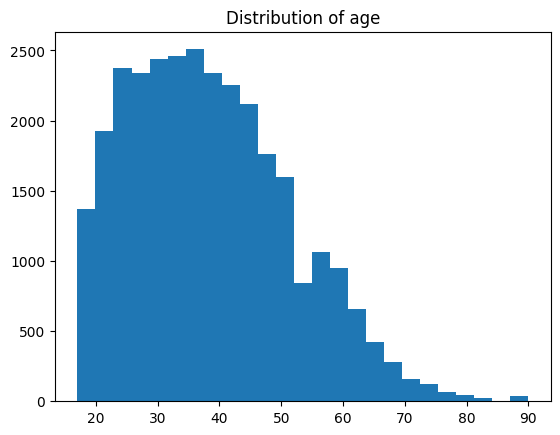

In [90]:
plt.hist(df['age'], bins=25)
plt.title('Distribution of age')
plt.show()

<ipython-input-91-fa6a3faf7111>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hours_result_counts = df.groupby(['hours_per_week_category', 'result'])['hours-per-week'].count().unstack()


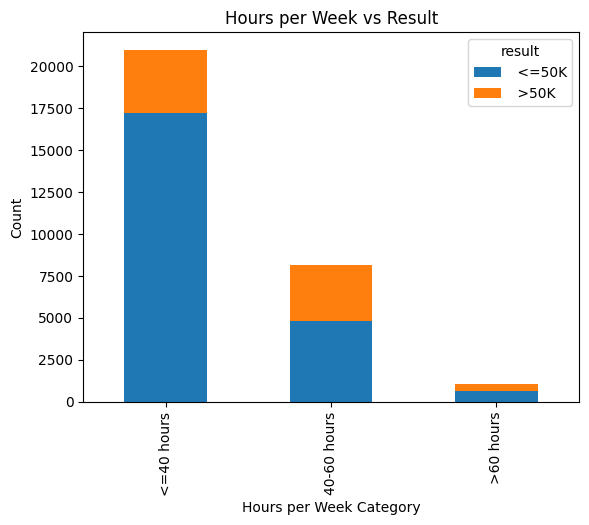

In [91]:
# prompt: create a stacked barchart with hours-per-week vs result with hours per week categorized into 3 categories 1.40 hours 2.>40 hourse and <40

# Create a new column for hours-per-week categories
df['hours_per_week_category'] = pd.cut(df['hours-per-week'], bins=[0, 40, 60, float('inf')],
                                       labels=['<=40 hours', '40-60 hours', '>60 hours'])

# Group by hours-per-week category and result, then count occurrences
hours_result_counts = df.groupby(['hours_per_week_category', 'result'])['hours-per-week'].count().unstack()

# Create the stacked bar chart
hours_result_counts.plot(kind='bar', stacked=True)
plt.title('Hours per Week vs Result')
plt.xlabel('Hours per Week Category')
plt.ylabel('Count')
plt.show()


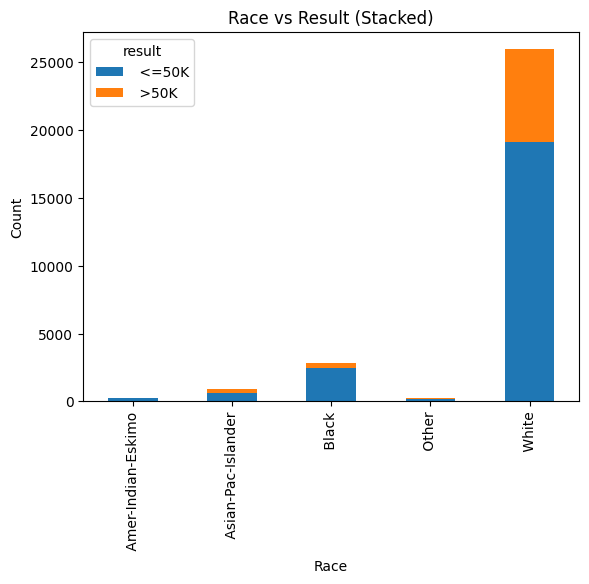

In [92]:
# prompt: create a barchart stacked with race vs result

# Group by race and result, then count occurrences
race_result_counts = df.groupby(['race', 'result'])['race'].count().unstack()

# Create the stacked bar chart
race_result_counts.plot(kind='bar', stacked=True)
plt.title('Race vs Result (Stacked)')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()


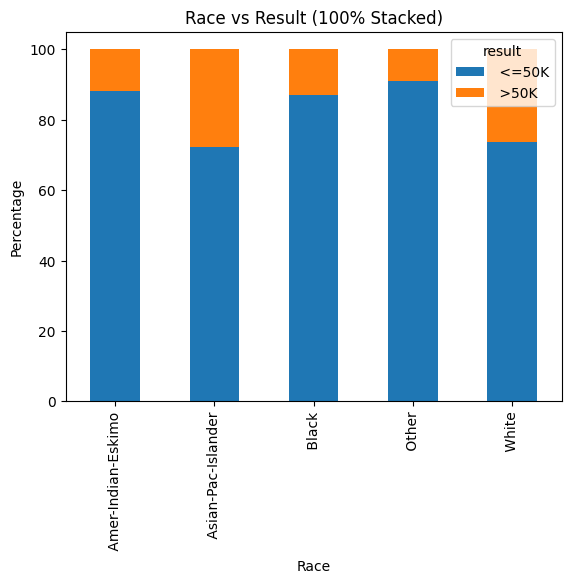

In [93]:
# prompt: create  a 100percent stacked bar chart with race vs result

# Group by race and result, then count occurrences
race_result_counts = df.groupby(['race', 'result'])['race'].count().unstack()

# Calculate the percentage for each category
race_result_counts_percent = race_result_counts.div(race_result_counts.sum(axis=1), axis=0) * 100

# Create the 100% stacked bar chart
race_result_counts_percent.plot(kind='bar', stacked=True)
plt.title('Race vs Result (100% Stacked)')
plt.xlabel('Race')
plt.ylabel('Percentage')
plt.show()


# Data Encoding



In [94]:
df=df.drop(['capital-gain'], axis=1)
df=df.drop(['capital-loss'], axis=1)

In [95]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,result,hours_per_week_category
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,<=40 hours
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,<=40 hours
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,<=40 hours
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,<=40 hours
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,<=40 hours


In [96]:

df=df.drop(['relationship'], axis=1)

In [97]:
df=df.drop(['fnlwgt'], axis=1)

In [98]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,race,sex,hours-per-week,native-country,result,hours_per_week_category
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,White,Male,40,United-States,<=50K,<=40 hours
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,13,United-States,<=50K,<=40 hours
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,White,Male,40,United-States,<=50K,<=40 hours
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States,<=50K,<=40 hours
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,40,Cuba,<=50K,<=40 hours


In [99]:
#first encoding workclass
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['workclass']= label_encoder.fit_transform(df['workclass'])

df['workclass'].unique()

array([5, 4, 2, 0, 1, 3, 6])

In [100]:
#first encoding workclass
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['marital-status']= label_encoder.fit_transform(df['marital-status'])

df['marital-status'].unique()

array([4, 2, 0, 3, 5, 1, 6])

In [101]:
#first encoding workclass
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['occupation']= label_encoder.fit_transform(df['occupation'])

df['occupation'].unique()

array([ 0,  3,  5,  9,  7, 11, 13,  4,  6, 12,  2, 10,  1,  8])

In [102]:
#first encoding workclass
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['race']= label_encoder.fit_transform(df['race'])

df['race'].unique()

array([4, 2, 1, 0, 3])

In [103]:
#first encoding workclass
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['sex']= label_encoder.fit_transform(df['sex'])

df['sex'].unique()

array([1, 0])

In [104]:
# prompt: remove the column hours_per_week_category

df = df.drop('hours_per_week_category', axis=1)


In [105]:
#first encoding workclass
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['education']= label_encoder.fit_transform(df['education'])

df['education'].unique()

array([ 9, 11,  1, 12,  6, 15,  7,  5, 10,  8, 14,  4,  0, 13,  2,  3])

In [106]:
#first encoding workclass
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['result']= label_encoder.fit_transform(df['result'])

df['result'].unique()

array([0, 1])

In [107]:

#first encoding workclass
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['native-country']= label_encoder.fit_transform(df['native-country'])

df['native-country'].unique()

array([38,  4, 22, 18, 25, 32, 15,  8,  1, 10, 19, 29, 30,  3,  0, 36,  6,
       24, 35, 13, 31,  5,  7,  9, 12, 21,  2, 34, 23, 40, 28, 27, 33, 37,
       11, 26, 39, 16, 20, 17, 14])

In [108]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,race,sex,hours-per-week,native-country,result
0,39,5,9,13,4,0,4,1,40,38,0
1,50,4,9,13,2,3,4,1,13,38,0
2,38,2,11,9,0,5,4,1,40,38,0
3,53,2,1,7,2,5,2,1,40,38,0
4,28,2,9,13,2,9,2,0,40,4,0


# Model Creation


## 1.Logistic Regression


In [109]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report
# Split the data into features and target

X = df.drop('result', axis=1)
y = df['result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [110]:
# import ml model from sklearn pacakge

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
# Predict the model for training data

predicted = logistic_model.predict(X_train) # Change X_test to X_train
# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train, predicted) # Change X_test to y_train
print('accuracy_score on train dataset : ', accuracy_train)

accuracy_score on train dataset :  0.7969023824184152


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##2.Random Forest

In [111]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier

rfc = RandomForestClassifier(random_state=0)

# fit the model

rfc.fit(X_train, y_train)

# Predict the Test set results

y_pred = rfc.predict(X_test)

# Check accuracy score

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.8149


In [112]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.8149


##3.XG Boost


In [113]:
# prompt: create a simple code for XG Boost modelling and also find the accuracy

!pip install xgboost
from xgboost import XGBClassifier

# Create an XGBoost classifier
xgb_model = XGBClassifier()

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print('XGBoost Model accuracy score: {0:0.4f}'.format(accuracy_xgb))


XGBoost Model accuracy score: 0.8402


##Since XGBoost has the hisghest Accuracy ,We are useing XGBoost for prediction


#Prediction


In [114]:
test_data=pd.read_csv('test.csv')
test_data.isnull().sum()


,0
age,0
workclass,0
education,0
education-num,0
marital-status,0
occupation,0
race,0
sex,0
hours-per-week,0
native-country,0


In [116]:
#test_data=test_data.drop(['capital-gain'], axis=1)
test_data=test_data.drop(['capital-loss'], axis=1)
test_data=test_data.drop(['relationship'], axis=1)
test_data=test_data.drop(['fnlwgt'],axis=1)


KeyError: "['capital-loss'] not found in axis"

In [117]:
test_data.head()

,age,workclass,education,education-num,marital-status,occupation,race,sex,hours-per-week,native-country,predictions
0,39,2,2,13,3,0,2,1,40,3,0
1,50,1,2,13,1,1,2,1,13,3,0
2,38,0,3,9,0,2,2,1,40,3,0
3,53,0,0,7,1,2,1,1,40,3,0
4,28,0,2,13,1,4,1,0,40,0,0


In [118]:
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
test_data['workclass']= label_encoder.fit_transform(test_data['workclass'])

test_data['workclass'].unique()

test_data['marital-status']= label_encoder.fit_transform(test_data['marital-status'])

test_data['marital-status'].unique()

test_data['occupation']= label_encoder.fit_transform(test_data['occupation'])

test_data['occupation'].unique()

test_data['race']= label_encoder.fit_transform(test_data['race'])

test_data['race'].unique()

test_data['sex']= label_encoder.fit_transform(test_data['sex'])

test_data['sex'].unique()


test_data['education']= label_encoder.fit_transform(test_data['education'])

test_data['education'].unique()
test_data['native-country']= label_encoder.fit_transform(test_data['native-country'])

test_data['native-country'].unique()

array([3, 0, 2, 1])

In [119]:
# prompt: predict the result values of the test_data using the XGboost model used earlier and save it into the test.csv

# Make predictions on the test data
# actualtest=test_data['result'] # Removed this line as 'result' column doesn't exist in test_data
test_data = test_data.drop('predictions', axis=1) # Removed this line as 'result' column doesn't exist in test_data
# prompt: create a simple code for XG Boost modelling and also find the accuracy

!pip install xgboost
from xgboost import XGBClassifier

# Create an XGBoost classifier
xgb_model = XGBClassifier()

# Train the model
# Assuming you have X_train and y_train defined somewhere in your code
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
predictions= xgb_model.predict(test_data) # Predict on the test data

# Evaluate the model - This will throw an error if y_test is not defined.
# accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
# print('XGBoost Model accuracy score: {0:0.4f}'.format(accuracy_xgb))
print(predictions)

[0 0 0 0 0 1 0 0 0 1 1 1]
